# EXPLORATORY ANALYSIS OF EV CHARGING DATASET (SFU)

## Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
%matplotlib inline

# Set display options for better viewing in Jupyter
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1000)

## Load and understand datasets

In [3]:
alarms_df = pd.read_csv('./given_data/datasets/Alarms.csv')
anomalies_df = pd.read_csv('./given_data/datasets/Anomalies.csv')
sessions_df = pd.read_csv('./given_data/datasets/Sessions.csv')
stations_df = pd.read_csv('./given_data/datasets/Stations.csv')

In [ ]:
print("Sessions DataFrame Info:")
print(f"Shape: {sessions_df.shape}")
sessions_df.info()
print("\nFirst 5 rows of Sessions DataFrame:")
display(sessions_df.head())

print("\n" + "="*80 + "\n")

In [ ]:
print("Stations DataFrame Info:")
print(f"Shape: {stations_df.shape}")
stations_df.info()
print("\nFirst 5 rows of Stations DataFrame:")
display(stations_df.head())

print("\n" + "="*80 + "\n")

In [ ]:
print("Alarms DataFrame Info:")
print(f"Shape: {alarms_df.shape}")
alarms_df.info()
print("\nFirst 5 rows of Alarms DataFrame:")
display(alarms_df.head())

print("\n" + "="*80 + "\n")

In [ ]:
print("Anomalies DataFrame Info:")
print(f"Shape: {anomalies_df.shape}")
anomalies_df.info()
print("\nFirst 5 rows of Anomalies DataFrame:")
display(anomalies_df.head())

print("\n" + "="*80 + "\n")

## Dataset pre-processing

In [4]:
# Remove columns with all null values
columns_to_drop = ['timezone_offset', 'status', 'time_stamp', 'mode']
stations_df_clean = stations_df.drop(columns=columns_to_drop)

# Verify the results
print(f"Original Stations shape: {stations_df.shape}")
print(f"Cleaned Stations shape: {stations_df_clean.shape}")

# Display the cleaned dataframe columns
print("\nCleaned Stations columns:")
print(stations_df_clean.columns.tolist())

stations_df = stations_df_clean

# Basic info on the cleaned dataframe
print("\nCleaned Stations info:")
print(stations_df.info())

Original Stations shape: (38, 23)
Cleaned Stations shape: (38, 19)

Cleaned Stations columns:
['station_id', 'org_id', 'station_group', 'model', 'activation_dt', 'address', 'manufacturer', 'station_name', 'description', 'port_no', 'reservable', 'level', 'connector', 'voltage', 'current', 'power', 'estimated_cost', 'location_lat', 'location_long']

Cleaned Stations info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   station_id      38 non-null     object 
 1   org_id          38 non-null     object 
 2   station_group   38 non-null     object 
 3   model           38 non-null     object 
 4   activation_dt   38 non-null     object 
 5   address         38 non-null     object 
 6   manufacturer    38 non-null     object 
 7   station_name    38 non-null     object 
 8   description     38 non-null     object 
 9   port_no         38 non-n

In [5]:
# Create a dataframe for the missing stations
new_stations_data = []

# New station information
station_info = [
    {"station_id": "0dc8ed1cc1", "address": "8915 Cornerstone Mews, Burnaby, British Columbia, V5A 4Y6, Canada", "location_lat": 49.27806955715426, "location_long": -122.91203807404098},
    {"station_id": "162185ed79", "address": "8999 Nelson Way, Burnaby, British Columbia, V5G 4N2, Canada", "location_lat": 49.27380817107044, "location_long": -122.9122931912351},
    {"station_id": "23ad8d0095", "address": "8888 University Drive, Burnaby, British Columbia, V5A1S6, Canada", "location_lat": 49.2797337375215, "location_long": -122.92418284890641},
    {"station_id": "615db15a48", "address": "13419 103 Ave, Surrey, British Columbia, V3T 1S6, Canada", "location_lat": 49.190413065036694, "location_long": -122.85111038200404},
    {"station_id": "87adf1b6d0", "address": "13419 103 Ave, Floor P1, Surrey, British Columbia, V3T 1R7, Canada", "location_lat": 49.19048327828886, "location_long": -122.85091700288174},
    {"station_id": "00c4ca50ea", "address": "8888 University Dr W, Floor P7000, Burnaby, British Columbia, Canada", "location_lat": 49.27963567579469, "location_long": -122.92405411918756},
    {"station_id": "01335ad401", "address": "8888 University Dr W, Burnaby, British Columbia, Canada", "location_lat": 49.27963567579469, "location_long": -122.92405411918756},
    {"station_id": "18db03c780", "address": "8888 University Dr W, Burnaby, British Columbia, Canada", "location_lat": 49.27963567579469, "location_long": -122.92405411918756},
    {"station_id": "4ce863e612", "address": "8888 University Dr W, Burnaby, British Columbia, Canada", "location_lat": 49.27963567579469, "location_long": -122.92405411918756},
    {"station_id": "956028aa4c", "address": "8888 University Dr W, Floor P7000, Burnaby, British Columbia, Canada", "location_lat": 49.27963567579469, "location_long": -122.92405411918756},
    {"station_id": "a9571abfa4", "address": "8888 University Dr W, Floor P7000, Burnaby, British Columbia, Canada", "location_lat": 49.27963567579469, "location_long": -122.92405411918756},
    {"station_id": "a96c3b900c", "address": "8888 University Dr W, Floor P7000, Burnaby, British Columbia, Canada", "location_lat": 49.27963567579469, "location_long": -122.92405411918756},
    {"station_id": "bba10a9daf", "address": "8999 Nelson Way, Burnaby, British Columbia, V5A 4W9, Canada", "location_lat": 49.27380817107044, "location_long": -122.91220736054855}
]

# Create a DataFrame with just the columns we are filling
for station in station_info:
    for port in [1, 2]:
        row = {
            'station_id': station['station_id'],
            'port_no': port,
            'address': station['address'],
            'location_lat': station['location_lat'],
            'location_long': station['location_long'],
            'reservable': 0
        }
        new_stations_data.append(row)

# Create a dataframe with the new stations
new_stations_df = pd.DataFrame(new_stations_data)

# Get integer column names from original dataframe
int_columns = stations_df.select_dtypes(include=['int64']).columns.tolist()

# For other columns that need non-null values, use appropriate defaults
for col in stations_df.columns:
    if col not in new_stations_df.columns:
        if col in int_columns:
            # For integer columns, use 0 as default
            new_stations_df[col] = 0
        else:
            # For other columns, use empty string for object types
            if stations_df[col].dtype == 'object':
                new_stations_df[col] = ''

# Combine with the original stations dataframe
stations_df = pd.concat([stations_df, new_stations_df], ignore_index=True)

print(f"Combined stations count: {len(stations_df)}")

Combined stations count: 64


In [6]:
# Extract unique station_id and address pairs
unique_stations = (
    stations_df[['station_id', 'address']]
    .drop_duplicates(subset=['station_id'])
    .reset_index(drop=True)
)

# Save to CSV
out_path = 'output_data/datasets/unique_station_addresses.csv'
unique_stations.to_csv(out_path, index=False)
print(f"\nSaved {len(unique_stations)} records to {out_path}")


Saved 32 records to output_data/datasets/unique_station_addresses.csv


In [6]:
# Convert date strings to datetime objects
sessions_df['start_dt'] = pd.to_datetime(sessions_df['start_dt'])
sessions_df['end_dt'] = pd.to_datetime(sessions_df['end_dt'])

# Extract useful time components for analysis
sessions_df['start_hour'] = sessions_df['start_dt'].dt.hour
sessions_df['start_day'] = sessions_df['start_dt'].dt.day_name()
sessions_df['start_date'] = sessions_df['start_dt'].dt.date  # For binning into hourly slots
sessions_df['is_weekend'] = sessions_df['start_dt'].dt.dayofweek >= 5  # True for weekend

# Convert duration strings to minutes for easier analysis, has format "HH:MM:SS"
def duration_to_minutes(duration_str):
    parts = duration_str.split(':')
    return int(parts[0]) * 60 + int(parts[1]) + int(parts[2])/60

sessions_df['charging_minutes'] = sessions_df['total_charging_duration'].apply(duration_to_minutes)
sessions_df['session_minutes'] = sessions_df['total_session_duration'].apply(duration_to_minutes)

# Create separate weekday and weekend datasets
sessions_weekday = sessions_df[~sessions_df['is_weekend']]
sessions_weekend = sessions_df[sessions_df['is_weekend']]

print(sessions_df.info())
# Basic statistics of charging sessions
print(sessions_df[['energy', 'charging_minutes', 'session_minutes']].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66009 entries, 0 to 66008
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   session_id               66009 non-null  int64         
 1   user_id                  66009 non-null  object        
 2   credential_id            66009 non-null  object        
 3   station_id               66009 non-null  object        
 4   port_no                  66009 non-null  int64         
 5   start_ts                 66009 non-null  int64         
 6   end_ts                   66009 non-null  int64         
 7   start_dt                 66009 non-null  datetime64[ns]
 8   end_dt                   66009 non-null  datetime64[ns]
 9   energy                   66009 non-null  float64       
 10  total_charging_duration  66009 non-null  object        
 11  total_session_duration   66009 non-null  object        
 12  address                  66009 n

## Some preliminary analysis

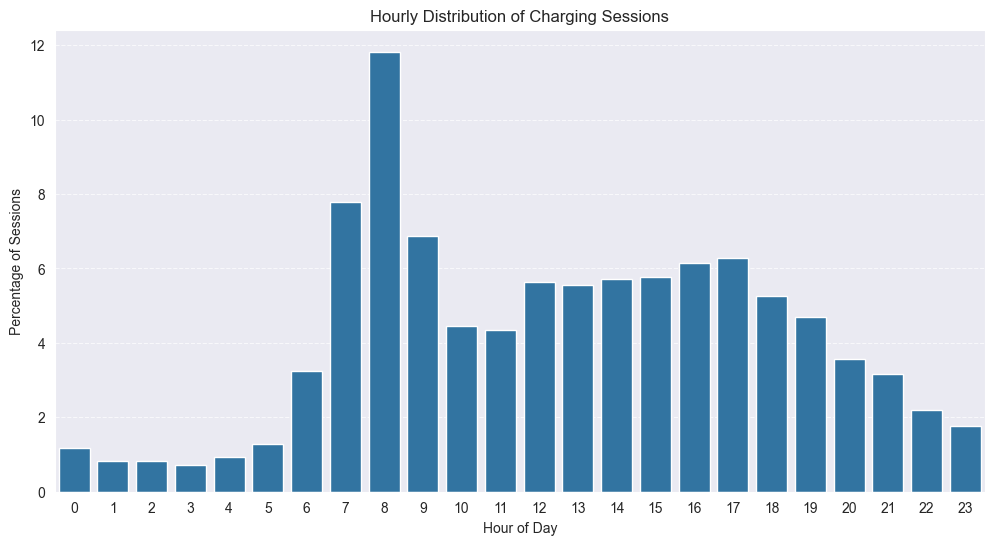

In [7]:
# Calculate hourly utilization patterns
hourly_usage = sessions_df.groupby('start_hour').size()
hourly_usage_normalized = hourly_usage / hourly_usage.sum() * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_usage_normalized.index, y=hourly_usage_normalized.values)
plt.title('Hourly Distribution of Charging Sessions')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Sessions')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

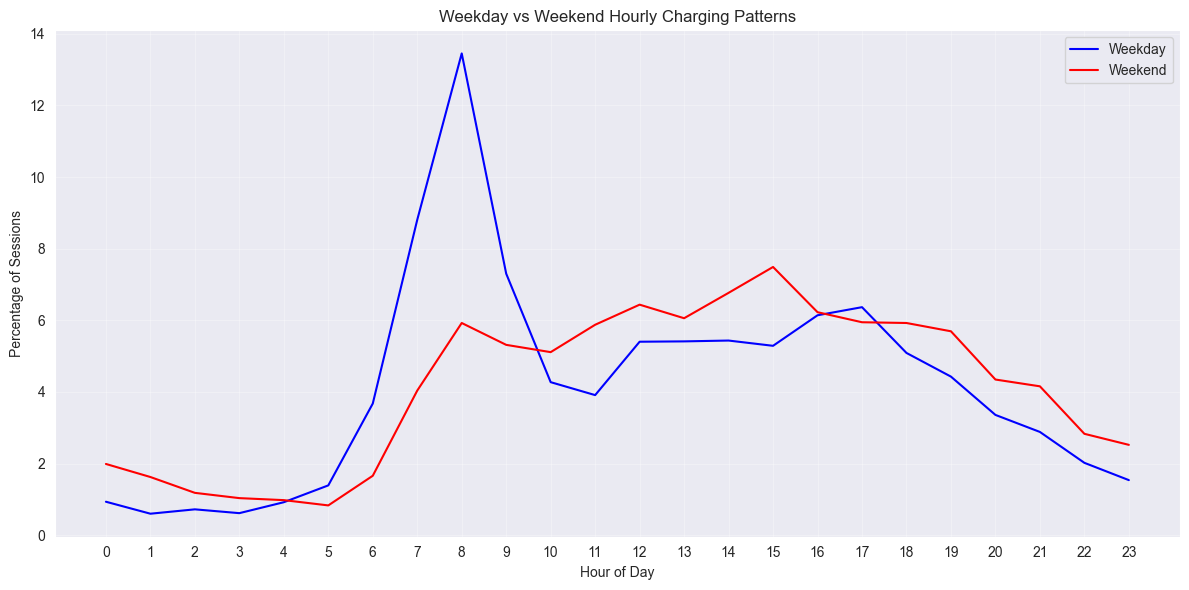

In [10]:
# Create a temporary copy
df_tmp = sessions_df[['start_dt']].copy()
df_tmp['start_dt']   = pd.to_datetime(df_tmp['start_dt'])
df_tmp['start_hour'] = df_tmp['start_dt'].dt.hour
df_tmp['weekday']    = df_tmp['start_dt'].dt.dayofweek < 5

# Aggregate counts by hour
weekday_hourly = df_tmp[df_tmp['weekday']].groupby('start_hour').size()
weekend_hourly = df_tmp[~df_tmp['weekday']].groupby('start_hour').size()

# Normalize to percentages
weekday_hourly = weekday_hourly / weekday_hourly.sum() * 100
weekend_hourly = weekend_hourly / weekend_hourly.sum() * 100

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(weekday_hourly.index, weekday_hourly.values, 'b-', label='Weekday')
plt.plot(weekend_hourly.index, weekend_hourly.values, 'r-', label='Weekend')
plt.title('Weekday vs Weekend Hourly Charging Patterns')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Sessions')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

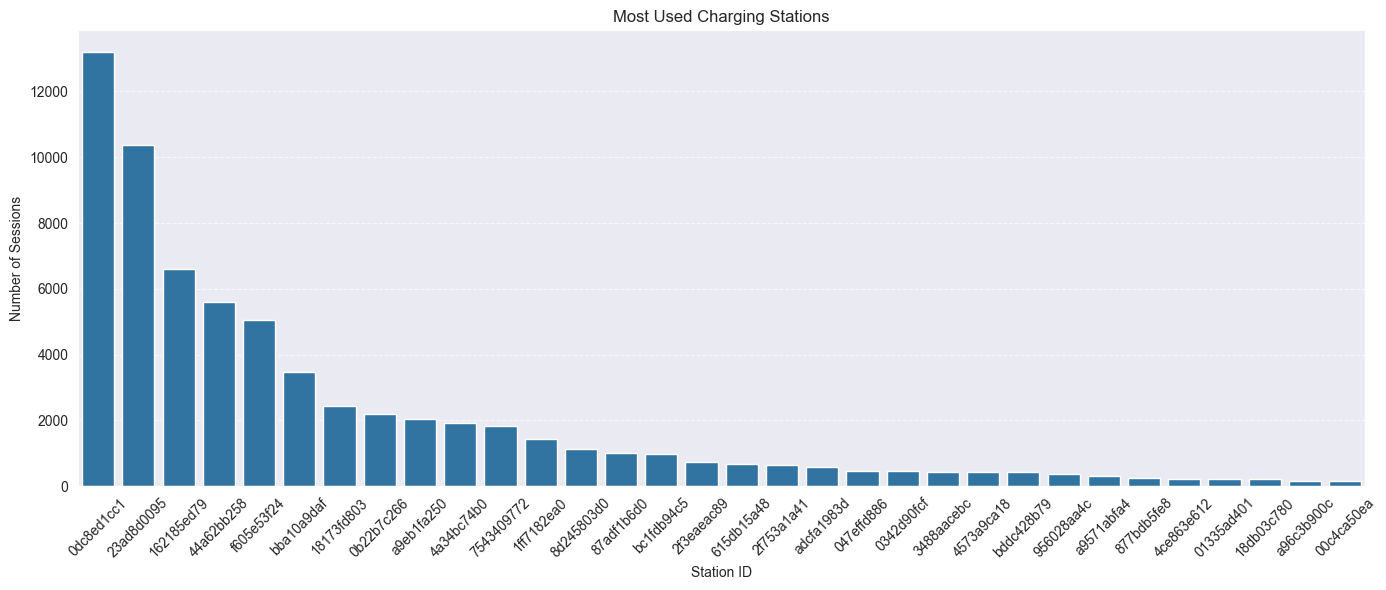

In [9]:
# Calculate utilization by station
station_usage = sessions_df.groupby('station_id').size().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=station_usage.index[:], y=station_usage.values[:])
plt.title('Most Used Charging Stations')
plt.xlabel('Station ID')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Top charging stations location analysis

In [11]:
# Given list of station IDs missing from `Stations.csv`
missing_station_ids = ['0dc8ed1cc1', '23ad8d0095', '162185ed79', 'bba10a9daf']

# Pull their addresses from the sessions data
addresses_for_missing = (
    sessions_df[sessions_df['station_id'].isin(missing_station_ids)]
    [['station_id', 'address']]
    .drop_duplicates()
    .reset_index(drop=True)
)

print("Addresses for missing stations:")
print(addresses_for_missing)

# Check if any station has more than one address
address_counts = addresses_for_missing.groupby('station_id').size()
if (address_counts > 1).any():
    print("\nWARNING: Some stations have multiple addresses!")
    print(address_counts[address_counts > 1])

Addresses for missing stations:
   station_id                                            address
0  162185ed79  8999 Nelson Way, Burnaby, British Columbia, V5...
1  23ad8d0095  8888 University  Drive, Burnaby, British Colum...
2  0dc8ed1cc1  8915 Cornerstone Mews, Burnaby, British Columb...
3  162185ed79  8999 Nelson Way, Burnaby, British Columbia, V5...
4  23ad8d0095  8888 University Dr, Burnaby, British Columbia,...
5  0dc8ed1cc1  8911 Cornerstone Mews, Burnaby, British Columb...
6  bba10a9daf  8999 Nelson Way, Burnaby, British Columbia, V5...

station_id
0dc8ed1cc1    2
162185ed79    2
23ad8d0095    2
dtype: int64


In [12]:
station_names = (
    alarms_df[alarms_df['station_id'].isin(missing_station_ids)]
    [['station_id', 'station_name']]
    .drop_duplicates()
    .reset_index(drop=True)
)

print("\nStation names from alarms data:")
print(station_names)


Station names from alarms data:
   station_id       station_name
0  162185ed79  SFU / DISCOVERY 1
1  23ad8d0095  SFU / STRAND HALL
2  0dc8ed1cc1     SFU / EAST LOT
3  162185ed79    SFU / DISCOVERY
4  bba10a9daf  SFU / DISCOVERY 2


In [13]:
import folium

# Compute total sessions per station
session_counts = (
    sessions_df
    .groupby('station_id')
    .size()
    .reset_index(name='session_count')
)

# Merge with station metadata to get names, addresses, and coordinates
station_map_data = (
    session_counts
    .merge(
        stations_df[[
            'station_id', 'station_name', 'address',
            'location_lat', 'location_long'
        ]],
        on='station_id',
        how='left'
    )
)

# Rank stations by session_count (1 = most busy)
station_map_data['rank'] = (
    station_map_data['session_count']
    .rank(method='min', ascending=False)
    .astype(int)
)

# Initialize Folium map centered on the network
center = [
    station_map_data['location_lat'].mean(),
    station_map_data['location_long'].mean()
]
vancouver_map = folium.Map(location=center, zoom_start=14, tiles='OpenStreetMap')

# Create feature groups by rank bucket
fg_top5    = folium.FeatureGroup(name="Top 5 Stations")
fg_6_10    = folium.FeatureGroup(name="Stations Ranked 6-10")
fg_11_20   = folium.FeatureGroup(name="Stations Ranked 11-20")
fg_others  = folium.FeatureGroup(name="Other Stations")

# Add markers
for _, row in station_map_data.iterrows():
    popup = (
        f"<b>Station:</b> {row['station_name']}<br>"
        f"<b>Rank:</b> {row['rank']} of {len(station_map_data)}<br>"
        f"<b>Sessions:</b> {row['session_count']}<br>"
        f"<b>Address:</b> {row['address']}"
    )
    icon = folium.Icon(
        color=(
            'red'    if row['rank'] <= 5
            else 'orange' if row['rank'] <= 10
            else 'blue'   if row['rank'] <= 20
            else 'green'
        ),
        icon='bolt', prefix='fa'
    )
    marker = folium.Marker(
        location=[row['location_lat'], row['location_long']],
        popup=folium.Popup(popup, max_width=300),
        tooltip=f"#{row['rank']}: {row['station_name']} ({row['session_count']} sessions)",
        icon=icon
    )

    if row['rank'] <= 5:
        marker.add_to(fg_top5)
    elif row['rank'] <= 10:
        marker.add_to(fg_6_10)
    elif row['rank'] <= 20:
        marker.add_to(fg_11_20)
    else:
        marker.add_to(fg_others)

# Add feature groups and legend
for fg in (fg_top5, fg_6_10, fg_11_20, fg_others):
    fg.add_to(vancouver_map)

legend_html = '''
<div style="position: fixed; bottom: 20px; left: 20px;
            border:2px solid grey; background:white;
            padding:8px; font-size:12px; border-radius:5px; z-index:9999;">
  <b>Color Key:</b><br>
  <i class="fa fa-bolt" style="color:red"></i> Top 5 &nbsp;
  <i class="fa fa-bolt" style="color:orange"></i> 6–10 &nbsp;
  <i class="fa fa-bolt" style="color:blue"></i> 11–20 &nbsp;
  <i class="fa fa-bolt" style="color:green"></i> Other
</div>
'''
vancouver_map.get_root().html.add_child(folium.Element(legend_html))

# Layer control & display
folium.LayerControl().add_to(vancouver_map)
vancouver_map

In [14]:
# Save as HTML file
vancouver_map.save('./output_data/vancouver_charging_stations.html')

## Methodology for Identifying Car‑share Charging Opportunities

### Objective
Identify reliable “deadzones” — periods when EV charging stations are consistently under‑utilised — so car‑share vehicles can be scheduled to charge without competing with public demand.

---

###  Analysis Approach

1. **Utilisation‑rate calculation**
   $$
   \text{Utilisation Rate} = \frac{\text{Chargers in use}}{\text{Total chargers}}\times100
   $$
   * Compute hourly rates for every station.
   * Aggregate by hour‑of‑day, day‑of‑week, and station.
   * Mark any hour < X % utilisation as a candidate “deadzone”.

2. **Deadzone identification**
   * Require ≥ Y consecutive sub‑X % hours to count as a meaningful window.
   * Map these windows network‑wide.
   * Note recurring patterns (time, day, location).

3. **Reliability assessment**
   $$
   \text{Reliability Index} = \frac{\text{Days deadzone occurs}}{\text{Total days observed}}\times100\%
   $$
   * Rate each deadzone; prioritise those ≥ Z %.
   * Produce a ranked list of high‑reliability charging opportunities.

---

### Initial setup

In [ ]:
# Calculate the number of ports per physical station
station_capacity = stations_df.groupby('station_id')['port_no'].count().reset_index()
station_capacity.rename(columns={'port_no': 'port_count'}, inplace=True)

# Verify all stations have 2 ports as expected
port_distribution = station_capacity['port_count'].value_counts()
print("Distribution of ports per station:")
print(port_distribution)

# Create a lookup dictionary for station capacity
station_capacity_dict = station_capacity.set_index('station_id')['port_count'].to_dict()

# Flag any stations with non-standard capacity (though we expect all to have 2 ports)
non_standard_stations = station_capacity[station_capacity['port_count'] != 2]
if len(non_standard_stations) > 0:
    print("\nStations with non-standard capacity:")
    print(non_standard_stations)
else:
    print("\nAll stations have the standard 2-port configuration.")

In [ ]:
# Extra pre-processing
sessions_df['end_hour'] = sessions_df['end_dt'].dt.hour
sessions_df['day_of_week'] = sessions_df['start_dt'].dt.dayofweek  # 0=Monday, 6=Sunday

print(f"Total sessions: {len(sessions_df)}")
print(f"Weekday sessions: {len(sessions_weekday)}")
print(f"Weekend sessions: {len(sessions_weekend)}")

### Generate hourly utilization dataset

In [ ]:
# Create a list to collect utilization data
utilization_data = []

# Get unique stations, dates
all_stations = stations_df['station_id'].unique()
all_dates = sessions_df['start_date'].unique()
all_hours = range(24)

# Process each station, date, and hour
for station in all_stations:
    # Get the total ports for this station (should be 2 always)
    total_ports = 2

    # Get all sessions for this station
    station_sessions = sessions_df[sessions_df['station_id'] == station]

    for date in all_dates:
        # Convert date to datetime for comparison
        date_dt = pd.to_datetime(date)
        next_date_dt = date_dt + pd.Timedelta(days=1)

        for hour in all_hours:
            # Calculate hour start and end times
            hour_start = date_dt.replace(hour=hour, minute=0, second=0)
            hour_end = date_dt.replace(hour=hour, minute=59, second=59)

            # Count sessions active during this hour
            active_sessions = station_sessions[
                ((station_sessions['start_dt'] <= hour_end) &
                 (station_sessions['end_dt'] >= hour_start))
            ].shape[0]

            # Ensure we never count more sessions than ports
            active_sessions = min(active_sessions, total_ports)

            # Calculate utilization rate
            utilization_rate = (active_sessions / total_ports) * 100

            # Add to data list
            utilization_data.append({
                'station_id': station,
                'date': date,
                'hour': hour,
                'chargers_in_use': active_sessions,
                'utilization_rate': utilization_rate
            })

# Create DataFrame from collected data
hourly_utilization = pd.DataFrame(utilization_data)

# Check if the issue is resolved
print("\nUpdated utilization rate statistics:")
print(hourly_utilization['utilization_rate'].describe())

In [ ]:
# Save the hourly_utilization DataFrame to CSV
hourly_utilization.to_csv('output_data/datasets/hourly_utilization.csv', index=False)
print("Hourly utilization data saved to output_data/datasets/hourly_utilization.csv")

### Generate hourly utilization heatmaps per station

In [ ]:
# Add day of week to the hourly_utilization DataFrame
hourly_utilization['date'] = pd.to_datetime(hourly_utilization['date'])
hourly_utilization['day_of_week'] = hourly_utilization['date'].dt.day_name()

# Group by station, day of week, and hour, then calculate mean utilization
station_day_hour_util = hourly_utilization.groupby(['station_id', 'day_of_week', 'hour'])['utilization_rate'].mean().reset_index()

# Sort days in correct order (Monday first)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
station_day_hour_util['day_of_week'] = pd.Categorical(station_day_hour_util['day_of_week'], categories=day_order, ordered=True)
station_day_hour_util = station_day_hour_util.sort_values(['station_id', 'day_of_week', 'hour'])

# Preview the result
print(station_day_hour_util.head(10))

In [ ]:
# Calculate first appearance date for each station based on the sessions data
first_appearances = sessions_df.groupby('station_id')['start_dt'].min().reset_index()
first_appearances.rename(columns={'start_dt': 'first_appearance'}, inplace=True)

# Load the hourly utilization data if working from saved file
hourly_utilization = pd.read_csv('output_data/datasets/hourly_utilization.csv')
hourly_utilization['date'] = pd.to_datetime(hourly_utilization['date'])

# Join with first appearances
hourly_utilization = hourly_utilization.merge(first_appearances, on='station_id', how='left')

# Filter to only include dates after a station's first appearance
hourly_utilization = hourly_utilization[hourly_utilization['date'] >= hourly_utilization['first_appearance']]

# Drop the first_appearance column as it's no longer needed
hourly_utilization = hourly_utilization.drop('first_appearance', axis=1)

# Then recalculate the day of week aggregation
hourly_utilization['day_of_week'] = hourly_utilization['date'].dt.day_name()
station_day_hour_util = hourly_utilization.groupby(['station_id', 'day_of_week', 'hour'])['utilization_rate'].mean().reset_index()

# Sort days in correct order (Monday first)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
station_day_hour_util['day_of_week'] = pd.Categorical(station_day_hour_util['day_of_week'],
                                                      categories=day_order, ordered=True)
station_day_hour_util = station_day_hour_util.sort_values(['station_id', 'day_of_week', 'hour'])

# Preview the result with filtered data
print(station_day_hour_util.head(10))

# Save the filtered result
station_day_hour_util.to_csv('output_data/datasets/station_day_hour_utilization_filtered.csv', index=False)

In [ ]:
# Save the result for future use
station_day_hour_util.to_csv('output_data/datasets/station_day_hour_utilization.csv', index=False)

In [ ]:
# Get list of all unique station IDs
all_station_ids = station_day_hour_util['station_id'].unique()

# Create a directory if it doesn't exist
import os
import matplotlib.colors as mcolors
import numpy as np
os.makedirs('output_data/visualizations/station_heatmaps', exist_ok=True)

# Loop through all stations and generate heatmaps
for station_id in all_station_ids:
    # Filter for just that station
    station_data = station_day_hour_util[station_day_hour_util['station_id'] == station_id]

    # Pivot data for heatmap (hour × day)
    pivot_data = station_data.pivot(index='hour', columns='day_of_week', values='utilization_rate')

    # Calculate statistics for adaptive scaling
    max_value = pivot_data.max().max()
    min_value = pivot_data.min().min()
    range_value = max_value - min_value
    mean_value = pivot_data.mean().mean()
    std_value = pivot_data.std().std()

    # Create adaptive scaling based on the data distribution
    if range_value < 1:  # Very small range
        vmax = max(max_value * 1.2, min_value + 1)
    elif max_value <= 5:  # Low utilization overall
        vmax = max(max_value * 1.5, 5)
    elif std_value < 1 and max_value > 5:  # Low variation but higher values
        vmax = min(mean_value + 3 * std_value, max_value * 1.2)
    else:  # Normal case with good variation
        vmax = min(max_value * 1.2, 100)  # Cap at 100% but allow higher than 10%

    # Ensure minimum contrast
    vmax = max(vmax, min_value + 2)  # Ensure at least 2 percentage points difference

    # Create a custom discrete colormap with visible steps
    # Define how many discrete color steps to use based on the value range
    if vmax <= 10:
        # For low ranges, use smaller steps (every 1%)
        n_colors = int(vmax) + 1
        levels = np.linspace(0, vmax, n_colors)
    elif vmax <= 25:
        # For medium ranges, use 2.5% steps
        n_colors = int(vmax / 2.5) + 1
        levels = np.linspace(0, vmax, n_colors)
    else:
        # For larger ranges, use 5% steps
        n_colors = int(vmax / 5) + 1
        levels = np.linspace(0, vmax, n_colors)

    # Choose base colormap and create a discrete version
    if max_value <= 5:
        base_cmap = plt.cm.Blues_r
    else:
        # Use viridis for better color differentiation
        base_cmap = plt.cm.viridis_r

    # Create discrete colormap
    cmap = mcolors.LinearSegmentedColormap.from_list(
        "custom_cmap",
        base_cmap(np.linspace(0, 1, n_colors)),
        N=n_colors
    )

    # Create figure
    plt.figure(figsize=(12, 8))

    # Plot heatmap with custom colormap and discrete levels
    sns.heatmap(pivot_data,
                cmap=cmap,
                vmin=0,
                vmax=vmax,
                annot=True,
                fmt='.1f',
                linewidths=0.5,
                cbar_kws={'label': f'Utilization Rate (%) [0-{vmax:.1f}]',
                          'ticks': levels[::max(1, len(levels)//10)]})  # Show ~10 tick marks

    plt.title(f'Station {station_id}: Average Utilization Rate by Day and Hour', fontsize=14)
    plt.xlabel('Day of Week', fontsize=12)
    plt.ylabel('Hour of Day', fontsize=12)
    plt.tight_layout()

    # Save to subfolder to keep organized
    plt.savefig(f'output_data/visualizations/station_heatmaps/station_{station_id}_utilization.png')
    plt.close()  # Close the figure to free memory

    print(f"Generated heatmap for station {station_id} (scale: 0-{vmax:.1f}%, {n_colors} color levels)")

print("All station heatmaps created successfully.")

### Generate top-K deadzone sessions for each station with threshold

In [ ]:
# constants
THRESHOLD = 6 # utilization % threshold for a “deadzone”
START_HOUR = 6
END_HOUR = 18
WINDOW_SIZE = 3
TOP_K = 5

# load your filtered, aggregated CSV
df = pd.read_csv('output_data/datasets/station_day_hour_utilization_filtered.csv')

# ensure day_of_week is in the right order
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'],
                                   categories=day_order,
                                   ordered=True)

print("Stations × (day, hour) rows:", len(df))

In [ ]:
windows = []

# for each station × day, slide a 3‑hour window
for station_id, grp in df.groupby('station_id'):
    # pivot hours → utilization for fast lookup
    pivot = grp.set_index(['day_of_week','hour'])['utilization_rate']
    for day in day_order:
        # extract only this day’s hours
        day_slice = pivot.loc[day]
        for h0 in range(START_HOUR, END_HOUR - WINDOW_SIZE + 1):
            hrs = [h0 + i for i in range(WINDOW_SIZE)]
            if all(h in day_slice.index for h in hrs):
                avg_util = day_slice.loc[hrs].mean()
                windows.append({
                    'station_id': station_id,
                    'day_of_week': day,
                    'start_hour': h0,
                    'end_hour':   h0 + WINDOW_SIZE - 1,
                    'avg_util':   avg_util
                })

window_df = pd.DataFrame(windows)
print("Total windows computed:", len(window_df))
window_df.head()

In [ ]:
# quick stats + key percentiles
pcts = window_df['avg_util'].quantile([0.01, 0.05, 0.1, 0.2, 0.25, 0.5])
print("Key percentiles of 3‑hr avg_util:")
print(pcts)

In [ ]:
# define which days count as weekdays/weekend
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday']
weekend  = ['Saturday','Sunday']

# keep only windows below the utilization threshold
dz = window_df[window_df['avg_util'] < THRESHOLD].copy()

# split into two DataFrames
dz_weekday = dz[dz['day_of_week'].isin(weekdays)].copy()
dz_weekend = dz[dz['day_of_week'].isin(weekend)].copy()

print(f"Deadzone windows (weekday): {len(dz_weekday)}")
print(f"Deadzone windows (weekend): {len(dz_weekend)}")

In [ ]:
# rank low to high avg_util per station
dz_weekday['rank'] = dz_weekday.groupby('station_id')['avg_util'] \
    .rank(method='first', ascending=True)

# select top K
top5_weekday = (
    dz_weekday[dz_weekday['rank'] <= TOP_K]
    .sort_values(['station_id','rank'])
    .reset_index(drop=True)
)

top5_weekday.head()

In [ ]:
dz_weekend['rank'] = dz_weekend.groupby('station_id')['avg_util'] \
    .rank(method='first', ascending=True)

top5_weekend = (
    dz_weekend[dz_weekend['rank'] <= TOP_K]
    .sort_values(['station_id','rank'])
    .reset_index(drop=True)
)

top5_weekend.head()

In [ ]:
top5_weekday.to_csv('output_data/datasets/top5_station_deadzones_weekday.csv', index=False)
top5_weekend.to_csv('output_data/datasets/top5_station_deadzones_weekend.csv', index=False)

print("Saved:")
print("weekday results to output_data/datasets/top5_station_deadzones_weekday.csv")
print("weekend results to output_data/datasets/top5_station_deadzones_weekend.csv")

In [ ]:
DAYS = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
OUT_DIR = 'output_data/visualizations/dot_calendar'

# Station list
stations = station_day_hour_util['station_id'].unique()

In [ ]:
# Loop over stations and build scatter points
for station_id in stations:
    # Extract top windows for this station
    twd = top5_weekday[top5_weekday.station_id == station_id]
    twe = top5_weekend [top5_weekend.station_id  == station_id]

    # Build x/y lists: one dot per hour in each 3‑hr block
    xs_wd, ys_wd = [], []
    for _, r in twd.iterrows():
        day_idx = DAYS.index(r.day_of_week)
        for h in range(r.start_hour, r.start_hour + WINDOW_SIZE):
            xs_wd.append(day_idx)
            ys_wd.append(h)

    xs_we, ys_we = [], []
    for _, r in twe.iterrows():
        day_idx = DAYS.index(r.day_of_week)
        for h in range(r.start_hour, r.start_hour + WINDOW_SIZE):
            xs_we.append(day_idx)
            ys_we.append(h)

    # Create figure
    fig, ax = plt.subplots(figsize=(8, 4))

    # Plot weekday dots (red circles) and weekend dots (blue squares)
    ax.scatter(xs_wd, ys_wd,
               s=100,
               c='red',
               marker='o',
               label='Weekday deadzone')
    ax.scatter(xs_we, ys_we,
               s=100,
               c='blue',
               marker='s',
               label='Weekend deadzone')

    # Aesthetics
    ax.set_xticks(range(len(DAYS)))
    ax.set_xticklabels(DAYS, rotation=45, ha='right')
    ax.set_yticks(range(START_HOUR, END_HOUR))
    ax.set_ylabel("Hour of Day")
    ax.set_title(f"Station {station_id}: Top 5 Deadzone Blocks w/ Threshold")

    # Legend placed just outside the plot on the right
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)

    # Leave space on the right for that legend
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    # Save and close
    out_path = os.path.join(OUT_DIR, f'station_{station_id}_dot_calendar.png')
    fig.savefig(out_path, dpi=150)
    plt.close(fig)

    print(f"Saved dot‑calendar to {out_path}")

### Generate top-K deadzone sessions for each station without threshold

In [ ]:
# Split into weekday / weekend without threshold
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday']
weekend  = ['Saturday','Sunday']

dz_weekday = window_df[window_df['day_of_week'].isin(weekdays)].copy()
dz_weekend = window_df[window_df['day_of_week'].isin(weekend)].copy()

print(f"All windows (weekday): {len(dz_weekday)}")
print(f"All windows (weekend): {len(dz_weekend)}")

In [ ]:
# Rank & pick lowest‑5 for weekdays
dz_weekday['rank'] = dz_weekday.groupby('station_id')['avg_util'] \
    .rank(method='first', ascending=True)
top5_weekday = (
    dz_weekday[dz_weekday['rank'] <= TOP_K]
    .sort_values(['station_id','rank'])
    .reset_index(drop=True)
)
print("Top‑5 weekday windows per station:")
top5_weekday.head(10)

In [ ]:
# Rank & pick lowest‑5 for weekends
dz_weekend['rank'] = dz_weekend.groupby('station_id')['avg_util'] \
    .rank(method='first', ascending=True)
top5_weekend = (
    dz_weekend[dz_weekend['rank'] <= TOP_K]
    .sort_values(['station_id','rank'])
    .reset_index(drop=True)
)
print("Top‑5 weekend windows per station:")
top5_weekend.head(10)

In [ ]:
# Save results
top5_weekday.to_csv('output_data/datasets/top5_station_deadzones_weekday_no_threshold.csv', index=False)
top5_weekend.to_csv('output_data/datasets/top5_station_deadzones_weekend_no_threshold.csv', index=False)

print("Weekday to output_data/datasets/top5_station_deadzones_weekday_no_threshold.csv")
print("Weekend to output_data/datasets/top5_station_deadzones_weekend_no_threshold.csv")

In [ ]:
# Prepare for dot‑calendar plotting
START_HOUR = 6
END_HOUR   = 18
WINDOW_SIZE = 3
DAYS       = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
OUT_DIR    = 'output_data/visualizations/dot_calendar_no_threshold'
os.makedirs(OUT_DIR, exist_ok=True)
stations   = station_day_hour_util['station_id'].unique()

In [ ]:
# Loop and save dot‑calendar, annotating util rates, legend outside
for station_id in stations:
    # get pivot for lookup of exact hour rates
    pivot = (
        station_day_hour_util
        .query("station_id == @station_id")
        .pivot(index='hour', columns='day_of_week', values='utilization_rate')
        .reindex(columns=DAYS)
    )

    # gather points + annotations
    xs_wd, ys_wd, an_wd = [], [], []
    for _, r in top5_weekday[top5_weekday.station_id==station_id].iterrows():
        d = DAYS.index(r.day_of_week)
        for h in range(r.start_hour, r.start_hour+WINDOW_SIZE):
            xs_wd.append(d); ys_wd.append(h)
            an_wd.append(pivot.loc[h, r.day_of_week])
    xs_we, ys_we, an_we = [], [], []
    for _, r in top5_weekend[top5_weekend.station_id==station_id].iterrows():
        d = DAYS.index(r.day_of_week)
        for h in range(r.start_hour, r.start_hour+WINDOW_SIZE):
            xs_we.append(d); ys_we.append(h)
            an_we.append(pivot.loc[h, r.day_of_week])

    fig, ax = plt.subplots(figsize=(8,4))
    # plot dots
    ax.scatter(xs_wd, ys_wd, s=100, c='red', marker='o', label='Weekday')
    ax.scatter(xs_we, ys_we, s=100, c='blue', marker='s', label='Weekend')
    # annotate rates
    for x,y,rate in zip(xs_wd+xs_we, ys_wd+ys_we, an_wd+an_we):
        ax.text(x+0.1, y, f"{rate:.1f}%", va='center', ha='left', fontsize=6)

    # aesthetics
    ax.set_xticks(range(len(DAYS)))
    ax.set_xticklabels(DAYS, rotation=45, ha='right')
    ax.set_yticks(range(START_HOUR, END_HOUR))
    ax.set_ylabel("Hour of Day")
    ax.set_title(f"Station {station_id}: Top 5 Deadzone Blocks w/out Threshold")
    # legend outside
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)
    plt.tight_layout()

    # save & close
    out_path = f"{OUT_DIR}/station_{station_id}_dot_calendar.png"
    fig.savefig(out_path, dpi=150)
    plt.close(fig)
    print(f"{station_id} to {out_path}")